In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report , confusion_matrix,ConfusionMatrixDisplay

In [13]:
df= pd.read_csv(r"C:\Users\Mariam\Downloads\cover.zip")

In [14]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [93]:
df.describe()

,Feature_0,Feature_1,Feature_2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Feature_0                           581012 non-null  int64
 1   Feature_1                           581012 non-null  int64
 2   Feature_2                           581012 non-null  int64
 3   Elevation                           581012 non-null  int64
 4   Aspect                              581012 non-null  int64
 5   Slope                               581012 non-null  int64
 6   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 7   Vertical_Distance_To_Hydrology      581012 non-null  int64
 8   Horizontal_Distance_To_Roadways     581012 non-null  int64
 9   Hillshade_9am                       581012 non-null  int64
 10  Hillshade_Noon                      581012 non-null  int64
 11  Hillshade_3pm                       581012 non-null 

In [97]:
df.shape

(581012, 55)

In [ ]:
df.columns

In [105]:
## null values
df.isnull().sum()

Feature_0                             0
Feature_1                             0
Feature_2                             0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area                       0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [107]:
## duplication check
df.duplicated().sum()

0

In [15]:
correlation = df.corr(numeric_only=True)['Cover_Type'].sort_values(ascending=False)
print(correlation)

Cover_Type                            1.000000
Wilderness_Area                       0.323200
Soil_Type10                           0.243876
Soil_Type38                           0.160170
Soil_Type39                           0.155668
Unnamed: 2                            0.148285
Soil_Type40                           0.128351
Soil_Type2                            0.118135
Soil_Type6                            0.112958
Soil_Type4                            0.099672
Soil_Type1                            0.090828
Soil_Type17                           0.090582
Aspect                                0.081664
Soil_Type35                           0.080315
Soil_Type37                           0.080271
Soil_Type5                            0.077890
Soil_Type3                            0.068064
Horizontal_Distance_To_Fire_Points    0.066846
Soil_Type14                           0.065562
Soil_Type11                           0.035379
Soil_Type36                           0.025397
Soil_Type13  

In [16]:
df = df.rename(columns = {'Unnamed: 0': 'Feature_0' , 'Unnamed: 1': 'Feature_1' , 'Unnamed: 2': 'Feature_2'})

In [17]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

In [18]:
## check the distribution of the target variable
print(y.value_counts(normalize=True) * 100)

Cover_Type
2    48.759922
1    36.460521
3     6.153746
7     3.530048
6     2.989095
5     1.633873
4     0.472796
Name: proportion, dtype: float64


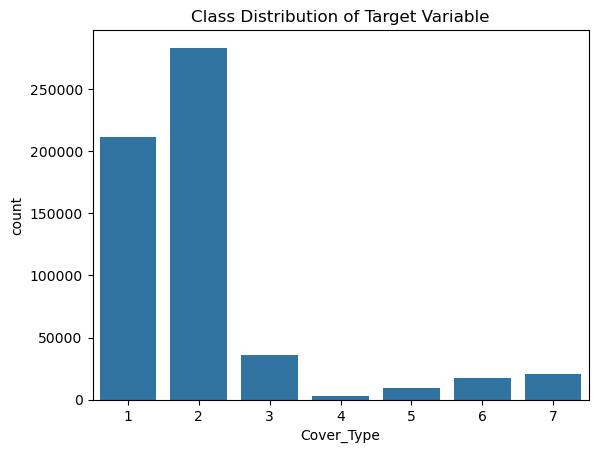

In [19]:
sns.countplot(x=y)
plt.title("Class Distribution of Target Variable")
plt.show()

## class distribution for Cover_Type clearly shows imbalance:
Class 2: ~48.8% of the data

Class 1: ~36.5% of the data

Class 4: less than 0.5% of the data

This means the model could easily favor classes 1 and 2 while ignoring minority classes (4, 5, 6, 7), leading to high accuracy but poor recall for rare classes.

## Train-test split


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **Handling** **Class** **Imbalance** **In** **Random** **Forest**

The dataset shows class imbalance among the 7 forest cover types.

To address this, we:

1.Used class_weight='balanced' in Random Forest to adjust misclassification penalties.

2.Compared macro metrics (precision, recall, F1) instead of accuracy alone.

## Model Training Random Forest


In [34]:
rf = RandomForestClassifier(n_estimators = 200 , random_state = 42 , class_weight = 'balanced')
rf.fit(X_train , y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [35]:
y_pred_rf = rf.predict(X_test)

In [38]:
print(metrics.classification_report(y_test , y_pred_rf))

              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.91      0.85      0.88       549
           5       0.95      0.79      0.86      1899
           6       0.94      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



In [40]:
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
precision_rf = metrics.precision_score(y_test, y_pred_rf, average='macro')
recall_rf = metrics.recall_score(y_test, y_pred_rf, average='macro')
F1_score_rf = metrics.f1_score(y_test, y_pred_rf, average='macro')

print({
    "Accuracy": accuracy_rf,
    "Precision (Macro)": precision_rf,
    "Sensitivity/Recall (Macro)": recall_rf,
    "F1 Score (Macro)": F1_score_rf
})

{'Accuracy': 0.9550786124282505, 'Precision (Macro)': 0.9460982737347926, 'Sensitivity/Recall (Macro)': 0.9085028797561466, 'F1 Score (Macro)': 0.9259664847786178}


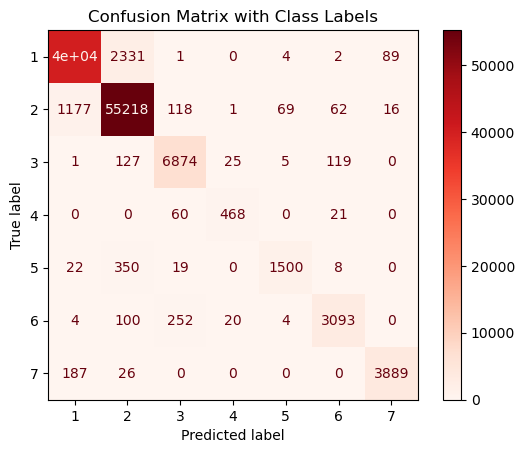

In [42]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf, labels=[1, 2, 3, 4, 5, 6, 7])

# Display with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5, 6, 7])
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix with Class Labels")
plt.show()

## Model Training XGBoost


#### XGBoost requires class labels to start from 0.
#### Since our Cover_Type classes range from 1 to 7, we subtract 1 from the labels before training and add 1 back to predictions.

In [46]:
## adjust labels foe xgboost
# Shift class labels to start from 0
y_train_adj = y_train - 1
y_test_adj = y_test - 1

In [52]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB 108.9 kB/s eta 0:08:42
   ---------------------------------------- 0.0/56.8 MB 108.9 kB/s eta 0:08:42
   ---------------------------------------- 0.0/56.8 MB 115.5 kB/s eta 0:08:12
   ---------------------------------------- 0.1/56.8 MB 156.1 kB/s eta 0:06:04
   ---------------------------------------- 0.1/56.8 MB 156.1 kB/s eta 0:06:04
   ---------------------------------------- 0.1/56.8 MB 169.9 kB/s eta 0:05:35
   ---------------------------------

In [54]:
from xgboost import XGBClassifier
param_grid_xgb = {
    'n_estimators' : [500],
    'max_depth' : [4, 6],
    'learning_rate': [0.05, 0.1, 0.3, 0.5, 1]
}

grid_search = GridSearchCV(XGBClassifier(random_state = 42), param_grid_xgb , cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train_adj)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.3, 0.5, 1],
                         'max_depth': [4, 6], 'n_estimators': [500]},
             scoring='accuracy')

In [56]:
# Compute class weights
classes = np.unique(y_train_adj)
weights = compute_class_weight('balanced' , classes = classes , y = y_train_adj)
weights


array([ 0.39181272,  0.29298132,  2.32147976, 30.20986611,  8.74391437,
        4.77913385,  4.04688479])

In [58]:
weight_dict = dict(zip(classes,weights))
weight_dict

{0: 0.39181272253992233,
 1: 0.29298131712974634,
 2: 2.3214797648598298,
 3: 30.209866112049916,
 4: 8.743914368486399,
 5: 4.779133850171708,
 6: 4.046884794873581}

In [64]:
# Assign sample weights
sample_weights = np.array([weight_dict[label] for label in y_train_adj])

In [70]:
##MODEL TRAINING
xgb = XGBClassifier(n_estimators=500, max_depth=6, learning_rate=1 , random_state = 42)
xgb.fit(X_train, y_train_adj ,sample_weight = sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [72]:
y_pred_xgb = xgb.predict(X_test) + 1

In [74]:
print(classification_report(y_test , y_pred_xgb))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96     42368
           2       0.97      0.96      0.97     56661
           3       0.96      0.97      0.96      7151
           4       0.89      0.90      0.89       549
           5       0.88      0.93      0.91      1899
           6       0.93      0.95      0.94      3473
           7       0.96      0.98      0.97      4102

    accuracy                           0.96    116203
   macro avg       0.93      0.95      0.94    116203
weighted avg       0.96      0.96      0.96    116203



In [76]:
accuracy_xgb = metrics.accuracy_score(y_test, y_pred_xgb)
precision_xgb = metrics.precision_score(y_test, y_pred_xgb, average='macro')
recall_xgb = metrics.recall_score(y_test, y_pred_xgb, average='macro')
F1_score_xgb = metrics.f1_score(y_test, y_pred_xgb, average='macro')

print({
    "Accuracy": accuracy_xgb,
    "Precision (Macro)": precision_xgb,
    "Sensitivity/Recall (Macro)": recall_xgb,
    "F1 Score (Macro)": F1_score_xgb
})

{'Accuracy': 0.9610509195115444, 'Precision (Macro)': 0.9347663183660087, 'Sensitivity/Recall (Macro)': 0.9489923787393819, 'F1 Score (Macro)': 0.9417334664207699}


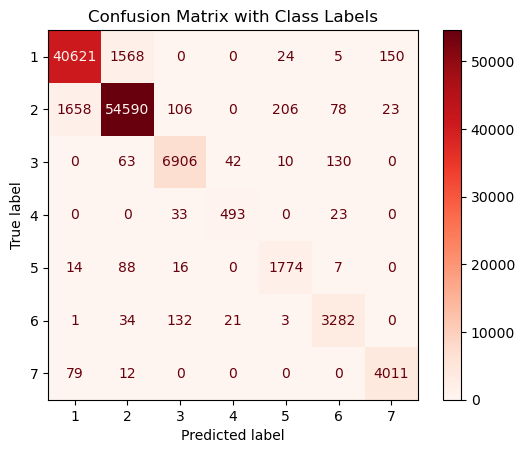

In [78]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb, labels=[1, 2, 3, 4, 5, 6, 7])

# Display with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5, 6, 7])
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix with Class Labels")
plt.show()


## Feature Importance Visualization


In [81]:
# Get feature importances
rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# Get feature importances
xgb_importances = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

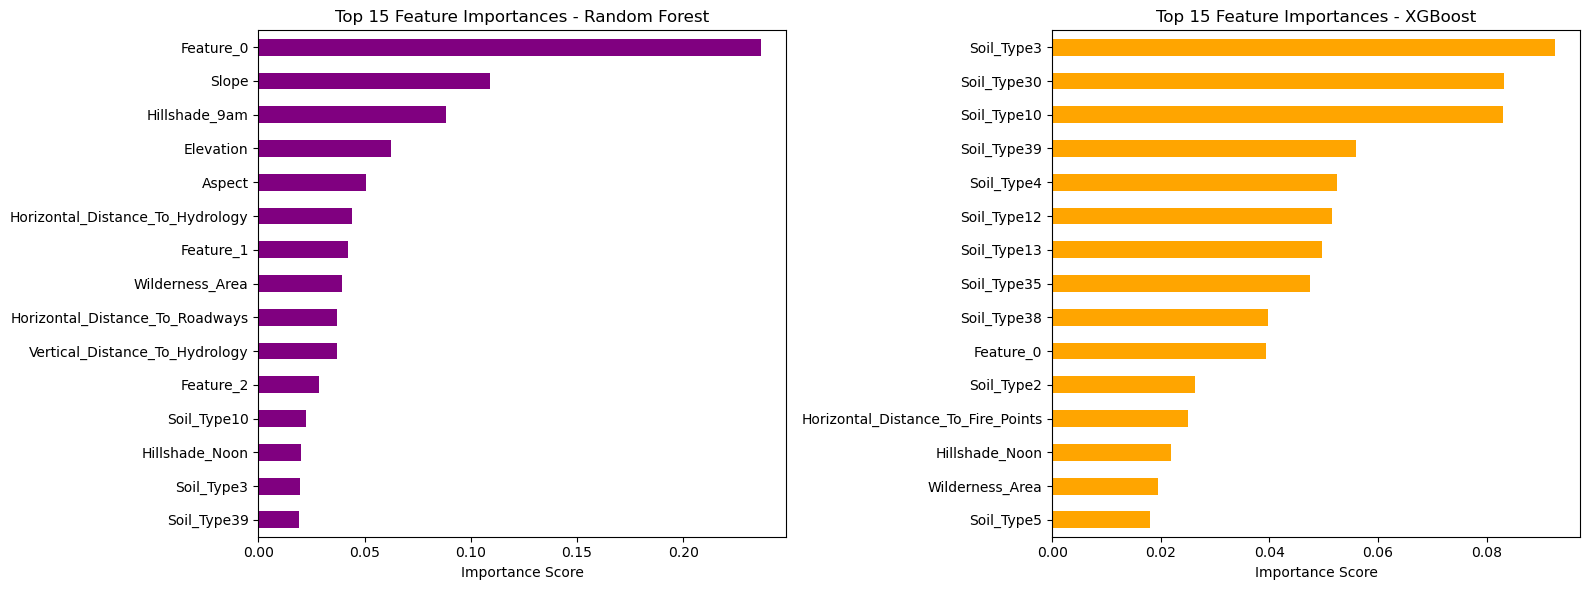

In [83]:
fig , axes = plt.subplots(1,2, figsize = (16,6))

rf_importances.head(15).sort_values().plot(kind = 'barh' , color = 'purple' , ax = axes[0])

axes[0].set_title("Top 15 Feature Importances - Random Forest")
axes[0].set_xlabel("Importance Score")

xgb_importances.head(15).sort_values().plot(kind = 'barh' , color = 'orange' , ax = axes[1])
axes[1].set_title("Top 15 Feature Importances - XGBoost")
axes[1].set_xlabel("Importance Score")

plt.tight_layout()
plt.show()

### COMPARING BETWEEN THE TWO MODELS

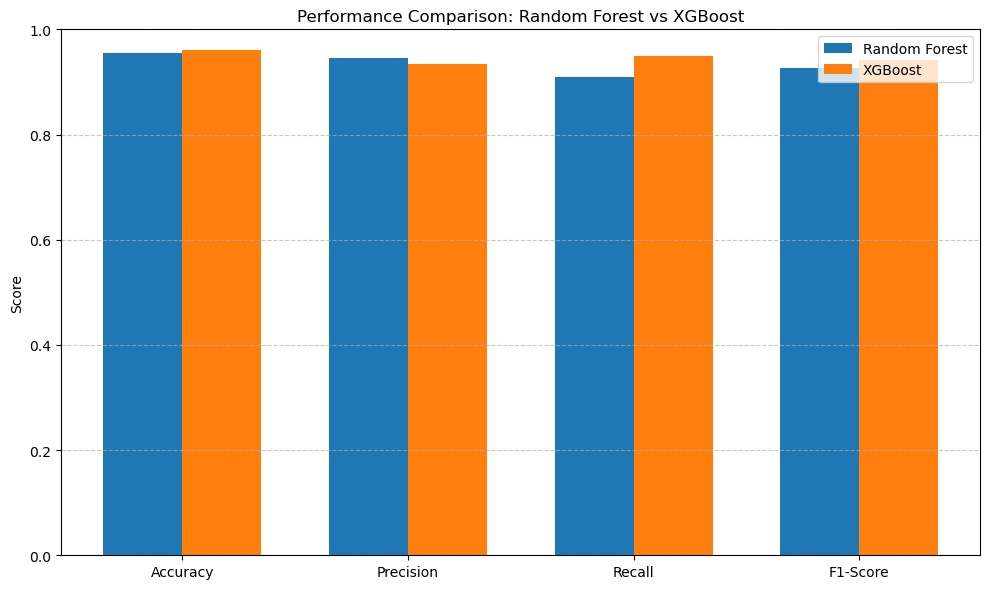

In [90]:
metrics_rf = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf, average='macro'),
    recall_score(y_test, y_pred_rf, average='macro'),
    f1_score(y_test, y_pred_rf, average='macro')
]

metrics_xgb = [
    accuracy_score(y_test, y_pred_xgb),
    precision_score(y_test, y_pred_xgb, average='macro'),
    recall_score(y_test, y_pred_xgb, average='macro'),
    f1_score(y_test, y_pred_xgb, average='macro')
]

# Labels
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics_names))  # label locations
width = 0.35  # bar width

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, metrics_rf, width, label='Random Forest')
plt.bar(x + width/2, metrics_xgb, width, label='XGBoost')

# Customize
plt.ylabel('Score')
plt.title('Performance Comparison: Random Forest vs XGBoost')
plt.xticks(x, metrics_names)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

### Apply weights in XGBoost training:

xgb = XGBClassifier(**best_params, random_state=42) xgb.fit(X_train, y_train_adj, sample_weight=sample_weights)

### Alternatively, if using GridSearchCV:

grid_search.fit(X_train, y_train_adj, sample_weight=sample_weights)